**ETAPA 1. Descripción del Proyecto**

Lo has hecho de maravilla en el curso de TripleTen y te han ofrecido hacer prácticas en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing. 

**Para iniciar se deben cargar todas las librerías que se van a usar durante el proyecto.**

In [166]:
# Cargar todas las librerías
from scipy import stats as st
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

**En este sección reuní la totalidad de los dataframe, la función .read_csv permite leer cada uno de los archivos cargados.**

In [167]:
# Cargar los archivos de datos de los diferentes DataFrames
df_visits = pd.read_csv('./datasets/visits_log_us.csv')
df_orders = pd.read_csv('./datasets/orders_log_us.csv')
df_costs = pd.read_csv('./datasets/costs_us.csv')

**Uso las funciones info() y head() para explorar visualmente cada dataframe con el fin de analizar que campos tiene, sus características, y los detalles que no sean funcionales corregir, para hacer un análisis acorde e ideal a lo solicitado.**

**1. Visitas**

In [168]:
#Imprimir la información general/resumida sobre el DataFrame visitas
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [169]:
# Imprimir una muestra de los datos para las visitas
df_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


**2. Órdenes**

In [170]:
#Imprimir la información general/resumida sobre el DataFrame órdenes
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [171]:
# Imprimir una muestra de los datos para las órdenes
df_orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


**3. Costos**

In [172]:
#Imprimir la información general/resumida sobre el DataFrame costos
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [173]:
# Imprimir una muestra de los datos para los costos
df_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


**ETAPA 2. Preprocesamiento de los datos**

**El objetivo aquí es preparar los datos para que sean analizados. Para ello hay que resolver cualquier problema que haya con los encabezados con el fin preservar las reglas del buen estilo, luego verificar y en su caso corregir los tipos de datos de cada columna, identificar los valores ausentes y en su caso completar dichos valores, y finalmente identificar y si fuera el caso eliminar los valores duplicados.**

**1. Visitas**

**ACCIONES A LLEVAR A CABO EN EL PREPROCESAMIENTO DE LOS DATOS DEL DATAFRAME VISITAS**

a. Cambiar todas las columnas a minúsculas y aplicar la regla de snake_case a los campos que lo requieran con el fin de preservar las reglas del buen estilo todo ello mediante una función.

b. Calcular el número de valores ausentes.

c. Corregir errores y preparar los datos de la columna END TS que incluye: convertir de tipo object a tipo datetime64[ns] la columna.

d. Corregir errores y preparar los datos de la columna START TS que incluye: convertir de tipo object a tipo datetime64[ns] la columna.

e. Revisar y eliminar duplicados.

f. Corregir errores y preparar los datos de la columna START TS que incluye: ver cuántas visitas hay por dispositivo.

g. Corregir errores y preparar los datos de la columna START TS que incluye: ver cuántos procedimientos hay por fuente de tráfico.

h. Identificar con las funciones MIN y MAX la fecha en que inicia la primera sesión y la fecha en que inicia la última sesión.

i. Identificar con las funciones MIN y MAX la fecha en que termina la primera sesión y la fecha en que termina la última sesión

j. Identificar cuántos registros terminan la fecha de la última sesión.

k. Enriquecer los datos a partir de la columna START TS para generar las columnas SESSION MONTH, SESSION WEEK y SESSION DATE.

**Tratamiento de las columnas**

In [174]:
# Mostrar los nombres de las columnas
df_visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [175]:
# Generar una función con el fin de reemplazar los nombres de las columnas para ponerlos en minúsculas y aplicar la regla de snake_case 
def clear_columns(data):
    new_columns = []
    
    for column in data.columns:
        clean_column = column.lower()
        clean_column = clean_column.replace(' ', '_')
        new_columns.append(clean_column)
        
    data.columns = new_columns
    
    return data

In [176]:
# Aplicar la función al dataframe visitas
df_visits = clear_columns(df_visits)

In [177]:
# Comprobar el resultado: la lista de encabezados
df_visits.head(0)

,device,end_ts,source_id,start_ts,uid


**Tratamiento de los valores ausentes**

Para este conjunto de datos caso de estudio no se procederá a realizar algún tratamiento de los valores ausentes ya que como se puede ver después de generar el código y ejecutar el mismo en la caja CODE de abajo, el dataframe VISITAS no cuenta con información de este tipo en ninguna de sus columnas.

In [178]:
# Calcular el número de valores ausentes
df_visits.isna().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

**Preparar los datos de la columna END TS**

In [179]:
# Convertir de tipo object a tipo datetime64[ns] la columna
df_visits['end_ts'] = pd.to_datetime(df_visits['end_ts'], format='%Y-%m-%d %H:%M:%S')

In [180]:
# Imprimir la información general actualizada
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  object        
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](1), int64(1), object(2), uint64(1)
memory usage: 13.7+ MB


**Preparar los datos de la columna START TS**

In [181]:
# Convertir de tipo object a tipo datetime64[ns] la columna
df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [182]:
# Imprimir la información general actualizada
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


**Revisar y eliminar duplicados**

In [183]:
# Revisar si hay valores duplicados
df_visits.duplicated().sum()

0

**Preparar los datos de la columna DEVICE**

In [184]:
# Ver cuántas visitas hay por dispositivo
df_visits.value_counts('device')

device
desktop    262567
touch       96833
Name: count, dtype: int64

**Preparar los datos de la columna SOURCE ID**

Estas fuentes se refieren a lo que usualmente se le llama UTM (Módulo de Seguimiento Urchin) es para poder monitorear las diferentes campañas que se lanzan desde las diferentes plataformas de publicidad en línea que permiten crear anuncios para promocionar un producto o servicio como Facebook Ads, Instagram Ads, Google Ads, YouTube Ads, y Amazon Ads entre otras. Se puede ver su trazabilidad a través de lo que son las fuentes 'SOURCE', en la práctica no son un sólo valor o id sino son varios como en este caso.

In [185]:
# Ver cuántos procedimientos hay por fuente de tráfico
df_visits.value_counts('source_id')

source_id
4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: count, dtype: int64

In [186]:
# Calcular con las funciones MIN y MAX la fecha en que inicia la primer sesión y la fecha en que inicia la última sesión
print(df_visits['start_ts'].min()) 
print(df_visits['start_ts'].max())

2017-06-01 00:01:00
2018-05-31 23:59:00


In [187]:
# Calcular con las funciones MIN y MAX la fecha en que termina la primer sesión y la fecha en que termina la última sesión
print(df_visits['end_ts'].min()) 
print(df_visits['end_ts'].max())

2017-06-01 00:02:00
2018-06-01 01:26:00


In [188]:
# Identificar cuántos registros terminan la fecha de la última sesión
df_visits[df_visits['end_ts'] > '2018-06-01']

,device,end_ts,source_id,start_ts,uid
2330,desktop,2018-06-01 00:05:00,2,2018-05-31 23:30:00,5300693976971713685
43215,desktop,2018-06-01 00:13:00,4,2018-05-31 23:46:00,12296626599487328624
46667,desktop,2018-06-01 00:13:00,5,2018-05-31 23:48:00,1107134732939577311
154728,desktop,2018-06-01 00:09:00,2,2018-05-31 22:52:00,12484396335714047199
198329,desktop,2018-06-01 00:11:00,3,2018-05-31 23:59:00,3720373600909378583
216791,touch,2018-06-01 00:06:00,5,2018-05-31 23:45:00,9951896961656595558
263781,desktop,2018-06-01 00:25:00,1,2018-05-31 23:59:00,4906562732540547408
269213,touch,2018-06-01 00:12:00,10,2018-05-31 23:59:00,10723414689244282024
288563,touch,2018-06-01 00:01:00,4,2018-05-31 23:37:00,1094281763368510391
299620,desktop,2018-06-01 00:04:00,4,2018-05-31 23:59:00,83872787173869366


**ENRIQUECER LOS DATOS**

In [189]:
# Enriquecer a partir de la columna start_ts por mes 
df_visits['session_month'] = df_visits['start_ts'].dt.month

In [190]:
# Enriquecer a partir de la columna start_ts por semana
df_visits['session_week'] = df_visits['start_ts'].dt.isocalendar().week

In [191]:
# Enriquecer a partir de la columna start_ts por día y convertir de tipo object a tipo datetime64[ns] la columna
df_visits['session_date'] = df_visits['start_ts'].dt.date
df_visits['session_date'] = pd.to_datetime(df_visits['session_date'], format='%Y-%m-%d')

In [192]:
# Imprimir una muestra de los datos para las visitas después de enriquecer el dataframe
df_visits.head()

,device,end_ts,source_id,start_ts,uid,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,12,52,2017-12-27


**2. Órdenes**

**ACCIONES A LLEVAR A CABO EN EL PREPROCESAMIENTO DE LOS DATOS DEL DATAFRAME VISITAS**

a. Cambiar todas las columnas a minúsculas y aplicar la regla de snake_case a los campos que lo requieran con el fin de preservar las reglas del buen estilo todo ello mediante la aplicación de la función generada en el apartado del dataframe VISITAS.

b. Calcular el número de valores ausentes.

c. Corregir errores y preparar los datos de la columna BUY TS que incluye: convertir de tipo object a tipo datetime64[ns] la columna.

d. Revisar y eliminar duplicados.

e. Identificar con las funciones MIN y MAX la fecha de la primera compra y la fecha de la última compra.

f. Enriquecer los datos a partir de la columna BUY TS para generar las columnas BUY MONTH y BUY DATE.

**Tratamiento de las columnas**

In [193]:
# Mostrar los nombres de las columnas
df_orders.columns

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

In [194]:
# Aplicar la función al dataframe orders
df_orders = clear_columns(df_orders)

In [195]:
# Comprobar el resultado: la lista de encabezados
df_orders.head(0)

,buy_ts,revenue,uid


**Tratamiento de los valores ausentes**

De igual forma para este conjunto de datos caso de estudio no se procederá a realizar algún tratamiento de los valores ausentes ya que como se puede ver después de generar el código y ejecutar el mismo en la caja CODE de abajo, el dataframe ÓRDENES no cuenta con información de este tipo en ninguna de sus columnas.

In [196]:
# Calcular el número de valores ausentes
df_orders.isna().sum()

buy_ts     0
revenue    0
uid        0
dtype: int64

**Preparar los datos de la columna BUY TS**

In [197]:
# Convertir de tipo object a tipo datetime64[ns] la columna
df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')

In [198]:
# Imprimir la información general actualizada
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


**Revisar y eliminar duplicados**

In [199]:
# Revisar si hay valores duplicados
df_orders.duplicated().sum()

0

In [200]:
# Identificar con las funciones MIN y MAX la fecha de la primera compra y la fecha de la última compra
print(df_orders['buy_ts'].min()) 
print(df_orders['buy_ts'].max())

2017-06-01 00:10:00
2018-06-01 00:02:00


**ENRIQUECER LOS DATOS**

In [201]:
# Enriquecer a partir de la columna buy_ts por mes
df_orders['buy_month'] = df_orders['buy_ts'].dt.to_period('M')

In [202]:
# Enriquecer a partir de la columna buy_ts por día y convertir de tipo object a tipo datetime64[ns] la columna
df_orders['buy_date'] = df_orders['buy_ts'].dt.date
df_orders['buy_date'] = pd.to_datetime(df_orders['buy_date'], format='%Y-%m-%d')

In [203]:
# Imprimir una muestra de los datos para los pedidos después de enriquecer el dataframe
df_orders.head()

,buy_ts,revenue,uid,buy_month,buy_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06-01


**3. Costos**

**ACCIONES A LLEVAR A CABO EN EL PREPROCESAMIENTO DE LOS DATOS DEL DATAFRAME VISITAS**

a. Cambiar todas las columnas a minúsculas y aplicar la regla de snake_case a los campos que lo requieran con el fin de preservar las reglas del buen estilo todo ello mediante la aplicación de la función generada en el apartado del dataframe VISITAS.

b. Calcular el número de valores ausentes.

c. Corregir errores y preparar los datos de la columna TS que incluye: convertir de tipo object a tipo datetime64[ns] la columna.

d. Revisar y eliminar duplicados.

e. Identificar con las funciones MIN y MAX la fecha del primer gasto de marketing y la fecha del último gasto marketing.

f. Enriquecer los datos a partir de la columna DT para generar las columnas DT MONTH y DT DATE.

**Tratamiento de las columnas**

In [204]:
# Mostrar los nombres de las columnas
df_costs.columns

Index(['source_id', 'dt', 'costs'], dtype='object')

In [205]:
# Aplicar la función al dataframe costs
df_costs = clear_columns(df_costs)

In [206]:
# Comprobar el resultado: la lista de encabezados
df_costs.head(0)

,source_id,dt,costs


**Tratamiento de los valores ausentes**

Para este último conjunto de datos caso de estudio también no se procederá a realizar algún tratamiento de los valores ausentes ya que como se puede ver después de generar el código y ejecutar el mismo en la caja CODE de abajo, el dataframe COSTOS no cuenta con información de este tipo en ninguna de sus columnas.

In [207]:
# Calcular el número de valores ausentes
df_costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

**Preparar los datos de la columna DT**

In [208]:
# Convertir de tipo object a tipo datetime64[ns] la columna
df_costs['dt'] = pd.to_datetime(df_costs['dt'], format='%Y-%m-%d')

In [209]:
# Imprimir la información general actualizada
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


**Revisar y eliminar duplicados**

In [210]:
# Revisar si hay valores duplicados
df_costs.duplicated().sum()

0

In [211]:
# Identificar con las funciones MIN y MAX la fecha del primer gasto de marketing y la fecha del último gasto marketing
print(df_costs['dt'].min()) 
print(df_costs['dt'].max())

2017-06-01 00:00:00
2018-05-31 00:00:00


**ENRIQUECER LOS DATOS**

In [212]:
# Enriquecer a partir de la columna dt por mes
df_costs['dt_month'] = df_costs['dt'].dt.to_period('M')

In [213]:
# Enriquecer a partir de la columna dt por día y convertir de tipo object a tipo datetime64[ns] la columna
df_costs['dt_date'] = df_costs['dt'].dt.date
df_costs['dt_date'] = pd.to_datetime(df_costs['dt_date'], format='%Y-%m-%d')

In [214]:
# Imprimir una muestra de los datos para los gastos después de enriquecer el dataframe
df_costs.head()

,source_id,dt,costs,dt_month,dt_date
0,1,2017-06-01,75.20,2017-06,2017-06-01
1,1,2017-06-02,62.25,2017-06,2017-06-02
2,1,2017-06-03,36.53,2017-06,2017-06-03
3,1,2017-06-04,55.00,2017-06,2017-06-04
4,1,2017-06-05,57.08,2017-06,2017-06-05


**ETAPA 3. Análisis exploratorio**

**Responder a las preguntas del negocio**

**Haz informes y calcula métricas** 

**1. Visitas**

# ¿Cuántas personas lo usan cada día, semana y mes?

In [215]:
# Calcular las visitas únicas por día
visits_per_day = df_visits.groupby('session_date')['uid'].nunique().sort_index()

In [216]:
# Imprimir los datos
visits_per_day

session_date
2017-06-01     605
2017-06-02     608
2017-06-03     445
2017-06-04     476
2017-06-05     820
              ... 
2018-05-27     620
2018-05-28    1039
2018-05-29     948
2018-05-30    1289
2018-05-31    1997
Name: uid, Length: 364, dtype: int64

In [217]:
# Calcular las visitas únicas por semana
visits_per_week = df_visits.groupby('session_week')['uid'].nunique().sort_index()

In [218]:
# Imprimir los datos
visits_per_week

session_week
1      6918
2      6703
3      6972
4      7060
5      8111
6      7908
7      7759
8      7518
9      7395
10     6844
11     6225
12     7898
13     4940
14     5383
15     5494
16     5740
17     5503
18     3916
19     4128
20     5070
21     4995
22     6867
23     4129
24     2812
25     2878
26     3064
27     3294
28     4355
29     3841
30     2655
31     2364
32     2444
33     2746
34     3116
35     3694
36     4412
37     4319
38     4874
39     6241
40     7612
41     7074
42     7148
43     7401
44     7480
45     7179
46     8117
47    10586
48     8166
49     8407
50     8214
51     7172
52     7774
Name: uid, dtype: int64

In [219]:
# Calcular las visitas únicas por mes
visits_per_month = df_visits.groupby('session_month')['uid'].nunique().sort_index()

In [220]:
# Imprimir los datos
visits_per_month

session_month
1     28716
2     28749
3     27473
4     21008
5     20701
6     13259
7     14183
8     11631
9     18975
10    29692
11    32797
12    31557
Name: uid, dtype: int64

In [221]:
# Calcular el promedio de visitas por día
print(f'El promedio de visitas por día es: {(visits_per_day).mean()}')

El promedio de visitas por día es: 907.9917582417582


In [222]:
# Calcular el promedio de visitas por semana
print(f'El promedio de visitas por semana es: {(visits_per_week).mean()}')

El promedio de visitas por semana es: 5825.288461538462


In [223]:
# Calcular el promedio de visitas por mes
print(f'El promedio de visitas por mes es: {(visits_per_month).mean()}')

El promedio de visitas por mes es: 23228.416666666668


**Graficar los resultados obtenidos por día, semana y mes**

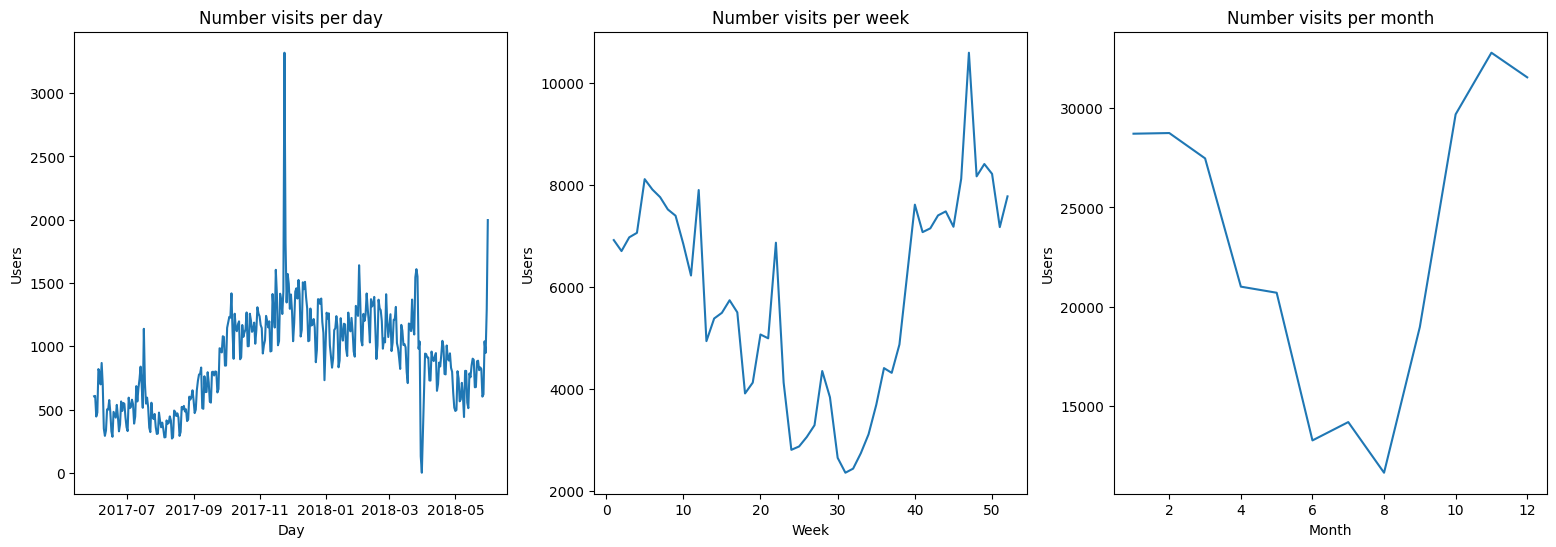

In [224]:
# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(1, 3, figsize=(19, 6))

sns.lineplot(data=visits_per_day, ax=axes[0])
axes[0].set(title='Number visits per day', xlabel='Day', ylabel='Users')

sns.lineplot(data=visits_per_week, ax=axes[1])
axes[1].set(title='Number visits per week', xlabel='Week', ylabel='Users')

sns.lineplot(data=visits_per_month, ax=axes[2])
axes[2].set(title='Number visits per month', xlabel='Month', ylabel='Users')

plt.show()

Después de generar las gráficas por periodo de tiempo de las visitas de los usuarios al sitio por días, semanas y meses se observa un movimiento constante que se mantiene variable con subidas y bajadas bien marcadas entre los lapsos de un día con otro respecto de la gráfica de 'día', entre las semanas en la gráfica de 'semana' y entre los meses en la gráfica de 'mes'; además sin importar que periodo de tiempo se analice el pico más alto de visitas se da a final de año entre la tercera y cuarta semana de noviembre y la primera y segunda semana de diciembre respectivamente y finalmente se observa que es en las vacaciones de verano cuando los usuarios menos visitan el sitio web de venta de entradas para eventos, porque ellos dan prioridad a otras actividades que resultan más entretenidas y de retroalimentación que disfrutan con amigos o familiares.  

# ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [225]:
# Calcular cuántas sesiones hay por día
sessions_per_user = df_visits.groupby('session_date').agg({'uid':['count', 'nunique']})

In [226]:
# Imprimir una muestra de los datos
sessions_per_user.head()

uid        
             count nunique
session_date              
2017-06-01     664     605
2017-06-02     658     608
2017-06-03     477     445
2017-06-04     510     476
2017-06-05     893     820

In [227]:
# Cambiar el nombre a las columnas
sessions_per_user.columns = ['num_sessions', 'num_users']

In [228]:
# Validar los cambios en el nombre de las columnas
sessions_per_user.columns

Index(['num_sessions', 'num_users'], dtype='object')

In [229]:
# Ratio de la cantidad de sesiones por usuario
sessions_per_user['session_per_user'] = sessions_per_user['num_sessions'] / sessions_per_user['num_users']

**Graficar los resultados obtenidos**

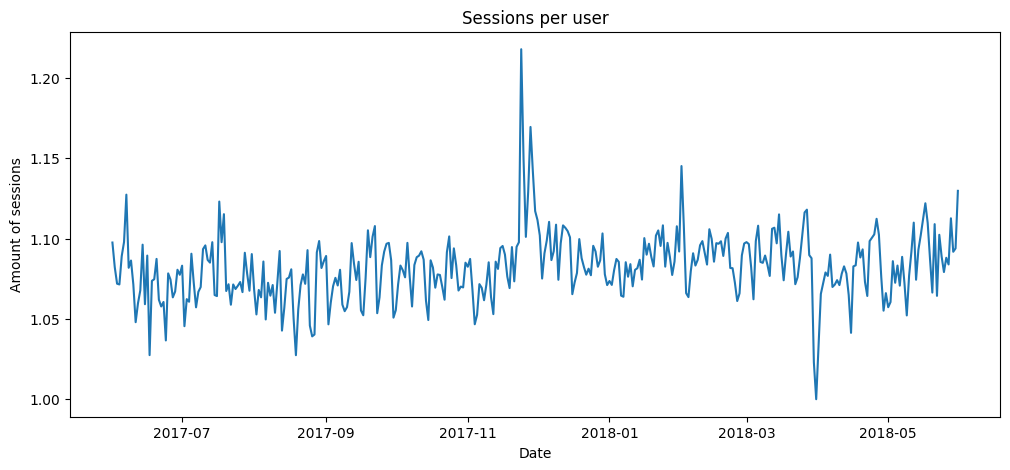

In [230]:
# Crear una figura y ejes para los subplots
fig = plt.subplots(figsize=(12, 5))

sns.lineplot(data=sessions_per_user['session_per_user']).set(title='Sessions per user', xlabel='Date', ylabel='Amount of sessions')

plt.show()


El gráfico muestra que el movimiento de la información es relativamente estable en el número de sesiones por usuario durante todo el periodo de tiempo, y que a pesar de las fluctuaciones diarias, la tendencia general del número de visitas por usuario promedio se mantiene en una línea constante alrededor del 1.08. Teniendo su pico más elevado el 'Black Friday' y el 'Cyber Monday' que corresponden al último viernes de Novimebre y primer lunes de Diciembre respectivamente, estos dos días son de grandes rebajas y descuentos por lo tanto las sesiones por usuario tienden a crecer considerablemente, y finalmente se puede observar que hay una tendencia negativa con caída libre en los días de 'Spring Break' conocido como breve receso de primavera que se da entre los últimos días del mes de Marzo y los primeros de días del mes de Abril.  

In [231]:
# Calcular el promedio de sesiones por usuario
print(f'El promedio de sesiones por usuario es: {round(sessions_per_user["session_per_user"].mean(),2)}')

El promedio de sesiones por usuario es: 1.08


# ¿Cuál es la duración de cada sesión?

In [232]:
# Calcular la duración de cada sesión y almacenar el resultado en la columna SESSION_DURATION 
df_visits['session_duration'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds

In [233]:
# Aplicar a la columna resultante del cálculo el método describe para que devuelva información estadística de los datos
df_visits['session_duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

**Graficar los resultados obtenidos**

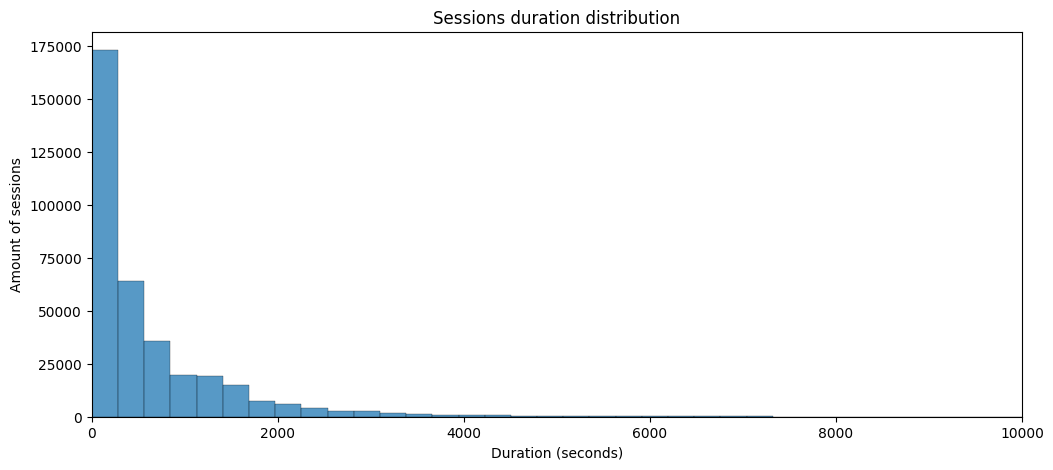

In [234]:
# Crear una figura y ejes para los subplots
fig = plt.subplots(figsize=(12, 5))

sns.histplot(data=df_visits['session_duration'], bins=300).set(title='Sessions duration distribution', xlabel='Duration (seconds)', ylabel='Amount of sessions')
plt.xlim(0, 10000)
plt.show()

Se puede observar en la gráfica que son alrededor de 300 segundos los que dividen a los datos en dos, es decir, 50% de ellos hacia la izquierda llegando a cero y el otro 50% de ellos hacia la derecha; la mitad de las sesiones dura menos 300 segundos y la otra mitad más de 300 segundos, se puede ver además mediante la cola que se extiende sobre el eje x, que hay sesiones que duran periodos de tiempo largos y estás dentro del universo de las sesiones que duran más de 300 segundos. En promedio la duración de una sesión es es de 644 segundos, pero hay sesiones que durante tan soló 60 segundos y algunas otras en las cuales los usuarios solo entran y salen del sitio web sin dejar  rastro alguno para un posterior análisis. Finalmente se puede ver que la frecuencia de las sesiones disminuye a medida que aumenta la duración. Esto sugiere que es menos común que los usuarios tengan sesiones más largas.    

In [235]:
# Calcular las métricas descriptivas: media, mediana y moda, que resumen los datos y facilitan la comprensión de la información
print(f'La media de la duración de l: {round(df_visits["session_duration"].mean()/60)} minutos')
print(f'La mediana de la duración de una sesión es de: {round(df_visits["session_duration"].median()/60)} minutos') 
print(f'La moda de la duración de una sesión es de: {round(df_visits["session_duration"].mode()[0]/60)} minuto') 

La media de la duración de l: 11 minutos
La mediana de la duración de una sesión es de: 5 minutos
La moda de la duración de una sesión es de: 1 minuto


**Resulta ideal diseñar un diagrama de caja para visualizar la distribución de la duración de una sesión.**

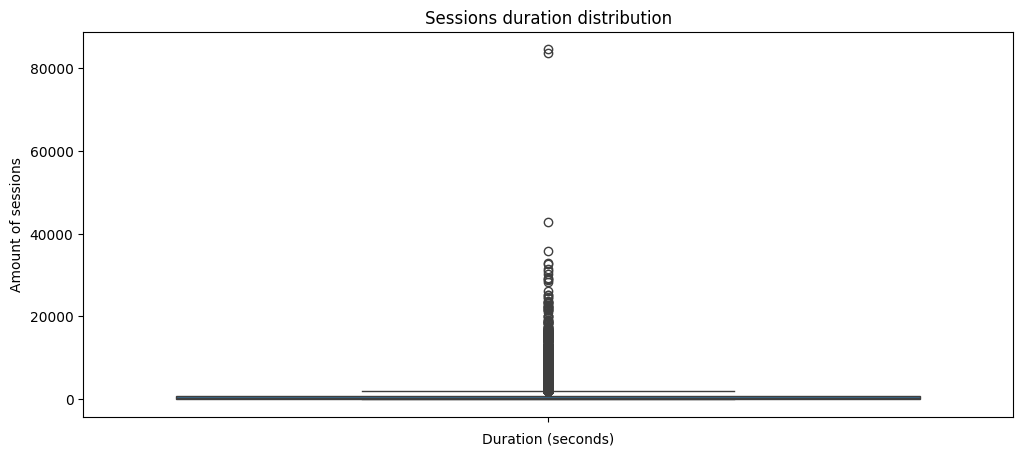

In [236]:
# Crear una figura y ejes para los subplots
fig = plt.subplots(figsize=(12, 5))

sns.boxplot(data=df_visits['session_duration']).set(title='Sessions duration distribution', xlabel='Duration (seconds)', ylabel='Amount of sessions')
plt.show()


El diagrama de caja complementa totalmente los datos mostrados en el histograma de la parte de arriba correspondiente a esta mismo apartado, en este se puede ver que hay una gran cantidad de valores atípicos que se desvian significativamente del resto de los datos, y que en el gráfico anterior están representados por la cola que se extiende considerablemente hacia el lado derecho del eje x. En este caso estos valores no afectan el análisis porqué los datos son así, lo que esta mostrando el diagrama de caja es como se comportan los usuarios en el sitio web; donde hay usuarios que tienen un comportamiento normal, es decir, que están menos de una hora o menos de 5 minutos pero hay usuarios que pasan largos periodos de tiempo, esos son realmente los usuarios que están mas enganchados con el servicio que ofrece la empresa Showz, esto permite visualizar además a esos clientes fieles a los cuales se les puede ofrecer en cierto momento un programa de lealtad donde se les otorgue algún descuento especial por ser tan constantes en la página web y hacer uso de su servicio.

# ¿Con qué frecuencia los usuarios regresan?

In [237]:
# Calcular las primeras visitas de los usuarios
first_visits = df_visits.groupby('uid')['start_ts'].min().reset_index()

In [238]:
# Imprimir una muestra de los datos
first_visits.head()

,uid,start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [239]:
# Cambiar el nombre a las columnas
first_visits.columns = ['uid', 'first_session_start_ts']

In [240]:
# Validar los cambios en el nombre de las columnas
first_visits.columns

Index(['uid', 'first_session_start_ts'], dtype='object')

In [241]:
# Obtener la fecha y el mes de cuando inicia la primersa sesión para cada usuario y convertir de tipo object a tipo datetime64[ns] la columna
first_visits['first_session_date'] = first_visits['first_session_start_ts'].dt.date
first_visits['first_session_date'] = pd.to_datetime(first_visits['first_session_date'], format='%Y-%m-%d')
first_visits['first_session_month'] = first_visits['first_session_start_ts'].dt.to_period('M')
df_visits['session_month'] = df_visits['start_ts'].dt.to_period('M')

In [242]:
# Imprimir una muestra de los datos
first_visits.head()

,uid,first_session_start_ts,first_session_date,first_session_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09


In [243]:
# Unir los dataframes FIRST VISITS y DF VISITS
complete_visits = pd.merge(first_visits, df_visits, on='uid')

In [244]:
# Imprimir una muestra de los datos
complete_visits.head()

,uid,first_session_start_ts,first_session_date,first_session_month,device,end_ts,source_id,start_ts,session_month,session_week,session_date,session_duration
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03,9,2018-03-01,360
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02,6,2018-02-06,120
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06,23,2017-06-07,60
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03,10,2018-03-11,360
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09,38,2017-09-18,1080


In [245]:
# Crear la columna VISIT IN MONTHS para calcular y almacenar el resultado del tiempo transcurrido desde la primera visita
complete_visits['visit_in_months'] = ((complete_visits['session_month'] - complete_visits['first_session_month'])).apply(lambda x: x.n).round().astype('int') 

In [246]:
# Imprimir una muestra de los datos
complete_visits.head()

,uid,first_session_start_ts,first_session_date,first_session_month,device,end_ts,source_id,start_ts,session_month,session_week,session_date,session_duration,visit_in_months
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03,9,2018-03-01,360,0
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02,6,2018-02-06,120,0
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06,23,2017-06-07,60,0
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03,10,2018-03-11,360,6
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09,38,2017-09-18,1080,0


In [247]:
# Compilar una tabla dinámica pivot table cohortes
cohortes_visits = complete_visits.pivot_table(
    index = 'first_session_month',
    columns = 'visit_in_months',
    values = 'uid',
    aggfunc = 'nunique'

)

In [248]:
# Mostrar resultado de la tabla dinámica
cohortes_visits

visit_in_months,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,NaN
2017-08,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,NaN,NaN
2017-09,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,NaN,NaN,NaN
2017-10,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,NaN,NaN,NaN,NaN
2017-11,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,NaN,NaN,NaN,NaN,NaN
2017-12,25268.0,1410.0,960.0,786.0,512.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,22624.0,1351.0,890.0,565.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,22197.0,1267.0,565.0,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
# Dejar valores ausentes en blanco
cohortes_visits.fillna(' ')

visit_in_months,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02,22197.0,1267.0,565.0,446.0,,,,,,,,


In [250]:
# Generar una tabla de retención vacía
retention_percentage = pd.DataFrame()

In [251]:
# Recorrer la colección de datos mediante la sentencia FOR para ir concatendo datos mediante la tabla vacía
for col in cohortes_visits.columns: 
    retention_percentage[col] = cohortes_visits[col] / cohortes_visits[0]

In [252]:
# Renombrar columna
retention_percentage.columns = cohortes_visits.columns

In [253]:
# Reasignar el índice
retention_percentage.index = [str(indice)[0:12] for indice in retention_percentage.index]

In [254]:
# Mostrar resultado de la tabla dinámica
retention_percentage

visit_in_months,0,1,2,3,4,5,6,7,8,9,10,11
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03,1.0,0.041818,0.027053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Graficar los resultados obtenidos**

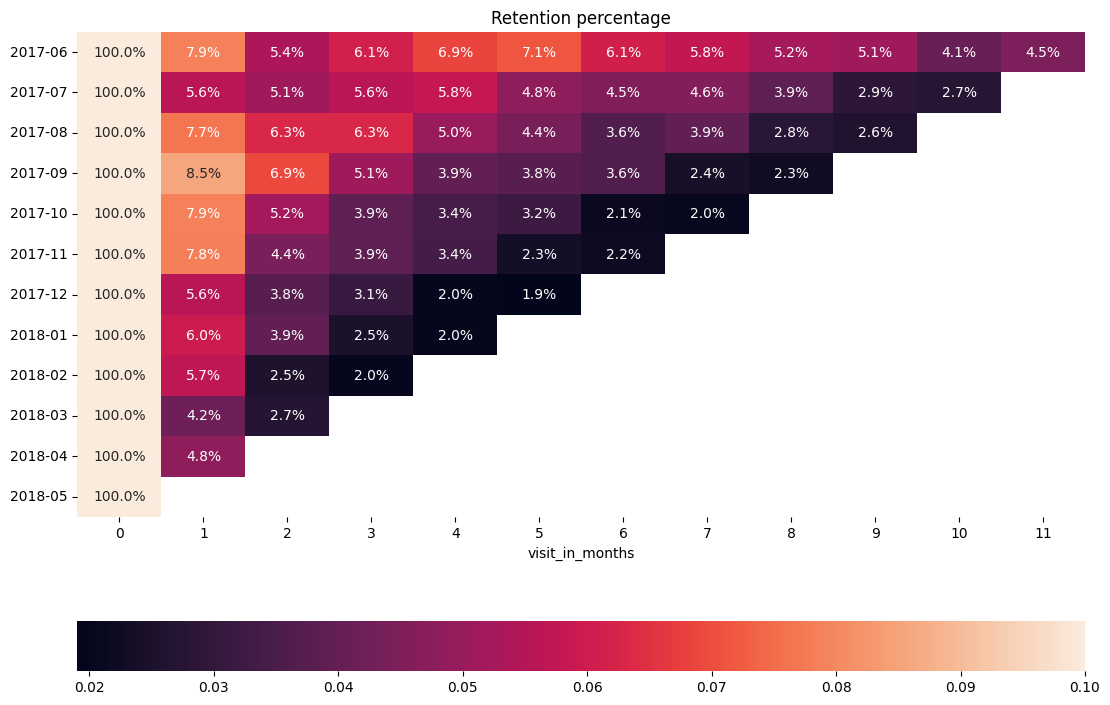

In [255]:
# Crear una figura y ejes para los subplots
fig = plt.subplots(figsize=(13, 9))

sns.heatmap(retention_percentage, annot=True, fmt='.1%', vmax=0.1, cbar_kws={'orientation':'horizontal'}).set(title='Retention percentage')
plt.show()

La gráfica de calor muestra información interesante, pero primero debo decir que las columnas representan el número de meses desde la visita inicial de los usuarios, que va desde 0 a 11 meses, mientras tanto las filas representan diferentes cohortes de los usuarios que comenzaron en un mes específico. La intensidad de color indica el porcentaje de retención. Los colores más oscuros representan menor retención esto se ve reflejado en la segunda cohorte para los meses febrero 2018 y marzo 2018 mientras que en la tercera cohorte está presente en los meses de enero 2018 y febrero 2018, en la cuarto cohorte esta tendencia se presente en diciembre 2017 y enero 2018, luego en la quinta cohorte la menor retención se da en los meses noviembre 2017 y diciembre 2017, en una siguiente tendecia que es la sexta cohorte la tendencia es octubre 2017 y noviembre 2017, en el caso de la séptima cohorte tenemos a los meses de septiembre 2017 y octubre 2017 con una tasa de retención muy baja, la octava corte con este tipo de movimientos nos presenta a los meses de agosto 2017 y septiembre 2017, luego en el caso de la novena cohorte los datos con esta tendencia a la baja corresponden al mesde julio 2017 y agosto 2017 y para la décima cohorte el mes que se encuentra en estás mismas condiciones es julio 2017. En cambio los colores más claros indican mayor retención esto se ve reflejado para todos los meses en la primera cohorte, en el caso de las cortes que van de la segunda a la octava cada uno de sus meses tienen esta tendencia a excepción de los dos últimos dos meses de cada de los corhores que tienen una tasa de retención baja como se puede ver en la gráfica representada y finalmente de la novena a la undécima corte en el mes junio 2017 está dentro de está tendencia. Cabe mecionar que para el mes 0 de retención la tendencia es naturalmente alta, ya que todos los usuarios están activos. Creo desde mi particular punto de vista que se debe de invertir entre un 2.5% a 3.5% más en las diversas fuentes de adquisición por que eso hará que se eleven un poco más las tasas de retención con respecto a las cohortes de cada uno de los meses que comprende el periodo.

**2. Ventas**

# ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)

In [256]:
# Calcular el primer registro
first_registration = df_visits.groupby('uid')['session_date'].min().reset_index()

In [257]:
# Cambiar el nombre a las columnas
first_registration.columns = ['uid', 'first_registration_ts']

In [258]:
# Validar los cambios en el nombre de las columnas
first_registration.columns

Index(['uid', 'first_registration_ts'], dtype='object')

In [259]:
# Imprimir una muestra de los datos
first_registration.head()

,uid,first_registration_ts
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06
2,297729379853735,2017-06-07
3,313578113262317,2017-09-18
4,325320750514679,2017-09-30


In [260]:
# Calcular la primera compra
first_order = df_orders.groupby('uid')['buy_date'].min().reset_index()

In [261]:
# Cambiar el nombre a las columnas
first_order.columns = ['uid', 'first_order_ts']

In [262]:
# Validar los cambios en el nombre de las columnas
first_order.columns

Index(['uid', 'first_order_ts'], dtype='object')

In [263]:
# Imprimir la información general/resumida sobre el DataFrame
first_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   uid             36523 non-null  uint64        
 1   first_order_ts  36523 non-null  datetime64[ns]
dtypes: datetime64[ns](1), uint64(1)
memory usage: 570.8 KB


In [264]:
# Imprimir una muestra de los datos
first_order.head()

,uid,first_order_ts
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24


In [265]:
# Convertir de tipo object a tipo datetime64[ns] la columna
first_order['first_order_ts'] = pd.to_datetime(first_order['first_order_ts'], format='%Y-%m-%d')

In [266]:
# Enriquecer a partir de la columna first_order_ts por día y por mes
first_order['first_order_dt'] = first_order['first_order_ts'].dt.date
first_order['first_order_month'] = first_order['first_order_ts'].dt.to_period('M')

In [267]:
# Imprimir una muestra de los datos
first_order.head()

,uid,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2018-01-03,2018-01-03,2018-01
1,1575281904278712,2017-06-03,2017-06-03,2017-06
2,2429014661409475,2017-10-11,2017-10-11,2017-10
3,2464366381792757,2018-01-28,2018-01-28,2018-01
4,2551852515556206,2017-11-24,2017-11-24,2017-11


In [268]:
# Unir los dataframes FIRST REGISTRATION y FIRST ORDER
buyers = first_registration.merge(first_order, on='uid')

In [269]:
# Imprimir una muestra de los datos
buyers.head()

,uid,first_registration_ts,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2017-09-18,2018-01-03,2018-01-03,2018-01
1,1575281904278712,2017-06-03,2017-06-03,2017-06-03,2017-06
2,2429014661409475,2017-10-11,2017-10-11,2017-10-11,2017-10
3,2464366381792757,2018-01-27,2018-01-28,2018-01-28,2018-01
4,2551852515556206,2017-11-24,2017-11-24,2017-11-24,2017-11


In [270]:
# Imprimir la información general/resumida sobre el DataFrame
buyers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   uid                    36523 non-null  uint64        
 1   first_registration_ts  36523 non-null  datetime64[ns]
 2   first_order_ts         36523 non-null  datetime64[ns]
 3   first_order_dt         36523 non-null  object        
 4   first_order_month      36523 non-null  period[M]     
dtypes: datetime64[ns](2), object(1), period[M](1), uint64(1)
memory usage: 1.4+ MB


In [271]:
# Convertir de tipo object a tipo datetime64[ns] la columna
buyers['first_registration_ts'] = pd.to_datetime(buyers['first_registration_ts'], format='%Y-%m-%d')
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'], format='%Y-%m-%d')

In [272]:
# Imprimir la información general/resumida sobre el DataFrame
buyers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   uid                    36523 non-null  uint64        
 1   first_registration_ts  36523 non-null  datetime64[ns]
 2   first_order_ts         36523 non-null  datetime64[ns]
 3   first_order_dt         36523 non-null  datetime64[ns]
 4   first_order_month      36523 non-null  period[M]     
dtypes: datetime64[ns](3), period[M](1), uint64(1)
memory usage: 1.4 MB


In [273]:
# Crear la columna DAY TO FIRST PURCHASE para calcular y almacenar el resultado de cuándo empieza la gente a comprar
buyers['day_to_first_purchase'] = (buyers['first_order_ts'] - buyers['first_registration_ts']).dt.days

In [274]:
# Imprimir una muestra de los datos
buyers.head()

,uid,first_registration_ts,first_order_ts,first_order_dt,first_order_month,day_to_first_purchase
0,313578113262317,2017-09-18,2018-01-03,2018-01-03,2018-01,107
1,1575281904278712,2017-06-03,2017-06-03,2017-06-03,2017-06,0
2,2429014661409475,2017-10-11,2017-10-11,2017-10-11,2017-10,0
3,2464366381792757,2018-01-27,2018-01-28,2018-01-28,2018-01,1
4,2551852515556206,2017-11-24,2017-11-24,2017-11-24,2017-11,0


**Graficar los resultados obtenidos**

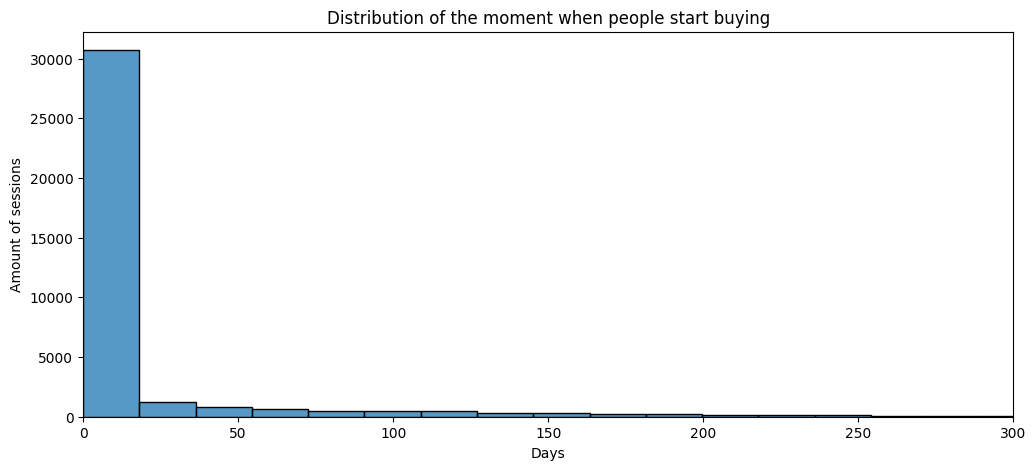

In [275]:
# Crear una figura y ejes para los subplots
fig = plt.subplots(figsize=(12, 5))

sns.histplot(data=buyers['day_to_first_purchase'], bins=20).set(title='Distribution of the moment when people start buying', xlabel='Days', ylabel='Amount of sessions')
plt.xlim(0, 300)
plt.show()

En este apartado y para el histograma que toca analizar se puede ver un pico significativo en el día 0, con más de 30,000 sesiones. Esto indica que muchas personas comienzan a comprar inmediatamente. Después de los primeros días, el número de sesiones disminuye rápidamente, esta tendencia quiere decir que la mayoría de las decisiones de compra se toman muy pronto. Finalmente se puede ver que desde la caída inicial, el número de sesiones continúa disminuyendo gradualmente a lo largo del tiempo.

# ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [276]:
# Calcular los pedidos durante un período de tiempo en MESES
orders_during_month = df_orders.groupby('buy_month')['uid'].count().reset_index()

In [277]:
# Cambiar el nombre a las columnas
orders_during_month.columns = ['buy_month', 'orders_per_month']

In [278]:
# Validar los cambios en el nombre de las columnas
orders_during_month.columns

Index(['buy_month', 'orders_per_month'], dtype='object')

In [279]:
# Imprimir los datos
orders_during_month

,buy_month,orders_per_month
0,2017-06,2354
1,2017-07,2363
2,2017-08,1807
3,2017-09,3387
4,2017-10,5679
5,2017-11,5659
6,2017-12,6218
7,2018-01,4721
8,2018-02,5281
9,2018-03,5326


**Graficar los resultados obtenidos**

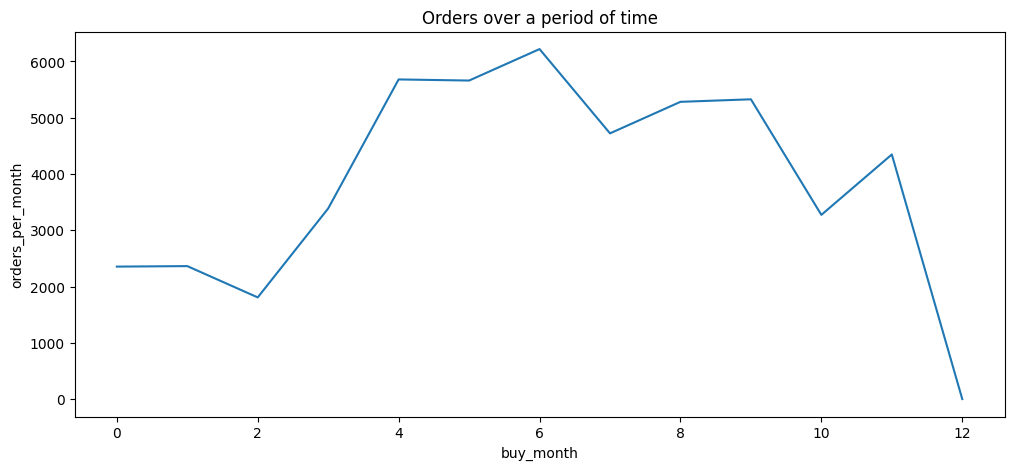

In [280]:
# Crear una figura y ejes para los subplots
fig = plt.subplots(figsize=(12, 5))
sns.lineplot(data=orders_during_month['orders_per_month']).set(title='Orders over a period of time', xlabel='buy_month', ylabel='orders_per_month')
plt.show()

La gráfica de líneas muestra picos altos y picos bajos respecto de un mes con otro arranca con alrededor de 2500 órdenes y luego cae a 2000 en el periodo correspondiente al siguiente mes de hay vuelve a subir el siguiente mes alrededor de 3500 órdenes manteniéndose con una tendencia creciente llegando al siguiente mes a 5600 órdenes teniendo una lugera caída en el mes siguiente al pasar del órden de 5600 a 5,500, luego vuelven ha crecer estás alrededor de 6300 teniendo el pico más elevado ya que es fin de año y las ofertas y descuentos están sensacionales en el black friday y en el cyber monday correspondientes al último viernes de noviembre y primer lunes de diciembre, luego para el siguiente mes tienen un caída considerable que ronda alrededor de los 4700 órdenes, de hay vuelve a tener un ligero incremento a 5000 órdenes en ese mes, y tienen una subida muy leve que pasa de 5000 a 5100 órdenes en ese mes para luego tener una caída aparatosa para irse hasta 3400 órdenes, luego para el penúltimo mes vuelve a subir a 4400 órdenes y luego la caída es en picada hasta caer a 500 órdenes en el último mes. Concluyó este análisis comentando que en el sector de las ventas los negocios siempre van a tener rachas buenas y rachas malas, lo importante es hacer buenas campañas de marketing dirijidas a nuestro público objetivo e ir por quienes aún están dudosos que querer ser parte de nuestra nucleo de clientes, el hacer esto eficientemente hará que los picos con tendencia a la baja vayan disminuyendo y poco a poco esa tendencia se vaya moviendo hacia arriba a lo largo del tiempo con esfuerzo, esmero y dedicación.  

# ¿Cuál es el tamaño promedio de compra?

In [281]:
# Calcular el tamaño promedio de compra por MES
average_purchase_size = df_orders.groupby('buy_month')['revenue'].mean().reset_index()

In [282]:
# Imprimir los datos
average_purchase_size

,buy_month,revenue
0,2017-06,4.060106
1,2017-07,5.306589
2,2017-08,4.847139
3,2017-09,5.416448
4,2017-10,4.928280
5,2017-11,4.783518
6,2017-12,5.852139
7,2018-01,4.112927
8,2018-02,4.840095
9,2018-03,5.413930


**Graficar los resultados obtenidos**

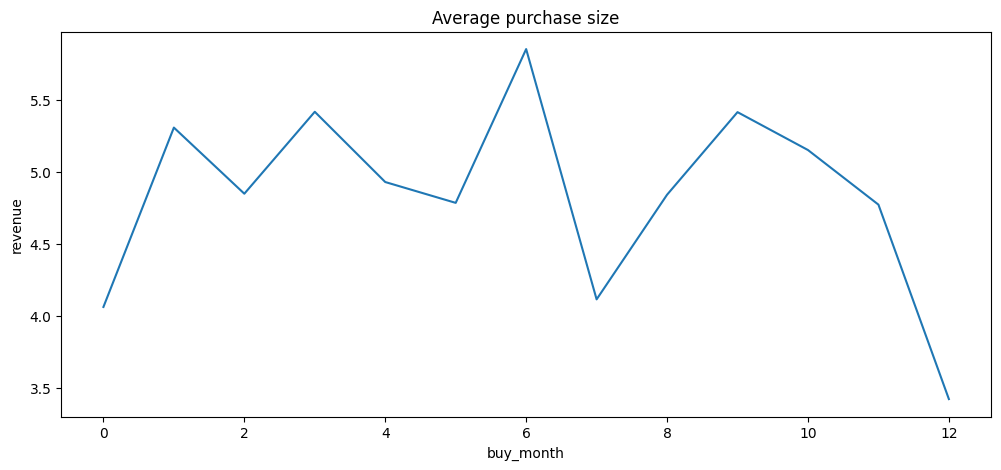

In [283]:
# Crear una figura y ejes para los subplots
fig = plt.subplots(figsize=(12, 5))
sns.lineplot(data=average_purchase_size['revenue']).set(title='Average purchase size', xlabel='buy_month', ylabel='revenue')
plt.show()

Al analizar este gráfico de líneas que responde a esta pregunta encuentro que se arranca con un tamaño promedio de compra de alredor del 4.2, teniendo un aumento significativo con un tamaño promedio de compra de 5.8 para diciembre de 2017 siendo este su pico más alto con respecto a todo el periodo, después del crecimiento tal alto en diciembre, el tamaño promedio de compra comienza a disminuir, llegando a su punto más bajo de alrededor de 3.5 en junio de 2018. Como último punto cabe resaltar que hay varias fluctuaciones notables a lo largo del periodo, lo que indica variabilidad en el tamaño promedio de compra mes a mes.

In [284]:
# Calcular el tamaño promedio de compra de todo el período 
purchase_average = round(df_orders['revenue'].mean(),6)
print(f'El tamaño promedio de compra de todo el período es de: {purchase_average}')

El tamaño promedio de compra de todo el período es de: 4.999647


# ¿Cuánto dinero traen? (LTV)

In [285]:
# Calcular la primera compra por mes
first_order_per_month = df_orders.groupby('uid')['buy_month'].min().reset_index()

In [286]:
# Cambiar el nombre a las columnas
first_order_per_month.columns = ['uid', 'first_order_month']

In [287]:
# Validar los cambios en el nombre de las columnas
first_order_per_month.columns

Index(['uid', 'first_order_month'], dtype='object')

In [288]:
# Imprimir una muestra de los datos
first_order_per_month.head()

,uid,first_order_month
0,313578113262317,2018-01
1,1575281904278712,2017-06
2,2429014661409475,2017-10
3,2464366381792757,2018-01
4,2551852515556206,2017-11


In [289]:
# Calcula el número de personas que hicieron su primer pedido durante el mes
cohort_sizes = first_order_per_month.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()

In [290]:
# Cambiar el nombre a las columnas
cohort_sizes.columns = ['first_order_month', 'number_buyers']

In [291]:
# Validar los cambios en el nombre de las columnas
cohort_sizes.columns

Index(['first_order_month', 'number_buyers'], dtype='object')

In [292]:
# Imprimir los datos
cohort_sizes

,first_order_month,number_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340
5,2017-11,4081
6,2017-12,4383
7,2018-01,3373
8,2018-02,3651
9,2018-03,3533


In [293]:
# Unir los dataframes DF ORDERS y FIRST ORDER PER MONTH
orders_money_ltv = df_orders.merge(first_order_per_month, on='uid')

In [294]:
# Agrupar los pedidos en cohortes
cohorts_ltv = (orders_money_ltv.groupby(['first_order_month', 'buy_month']).agg({'revenue':'sum'}).reset_index())

In [295]:
# Unir los dataframes COHORT SIZES y COHORTS LTV 
final_report_ltv = cohort_sizes.merge(cohorts_ltv, on='first_order_month')

In [296]:
# Calcular la edad de cada cohorte en meses
final_report_ltv['cohort_in_months'] = (final_report_ltv['buy_month'] - final_report_ltv['first_order_month']).apply(lambda x: x.n).round().astype('int') 

In [297]:
# Calcular el LTV para las cohortes
final_report_ltv['ltv'] = final_report_ltv['revenue'] / final_report_ltv['number_buyers']

In [298]:
# Calcular los valores para la tabla dinámica
cohorts_result = final_report_ltv.pivot_table(
    index='first_order_month', columns='cohort_in_months', values='ltv', aggfunc='sum').cumsum(axis=1).round(2)

In [299]:
# Imprimir tabla dinámica y dejar valores ausentes en blanco
cohorts_result.fillna(' ')

cohort_in_months,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02,4.16,4.44,4.51,4.59,,,,,,,,


**Graficar los resultados obtenidos**

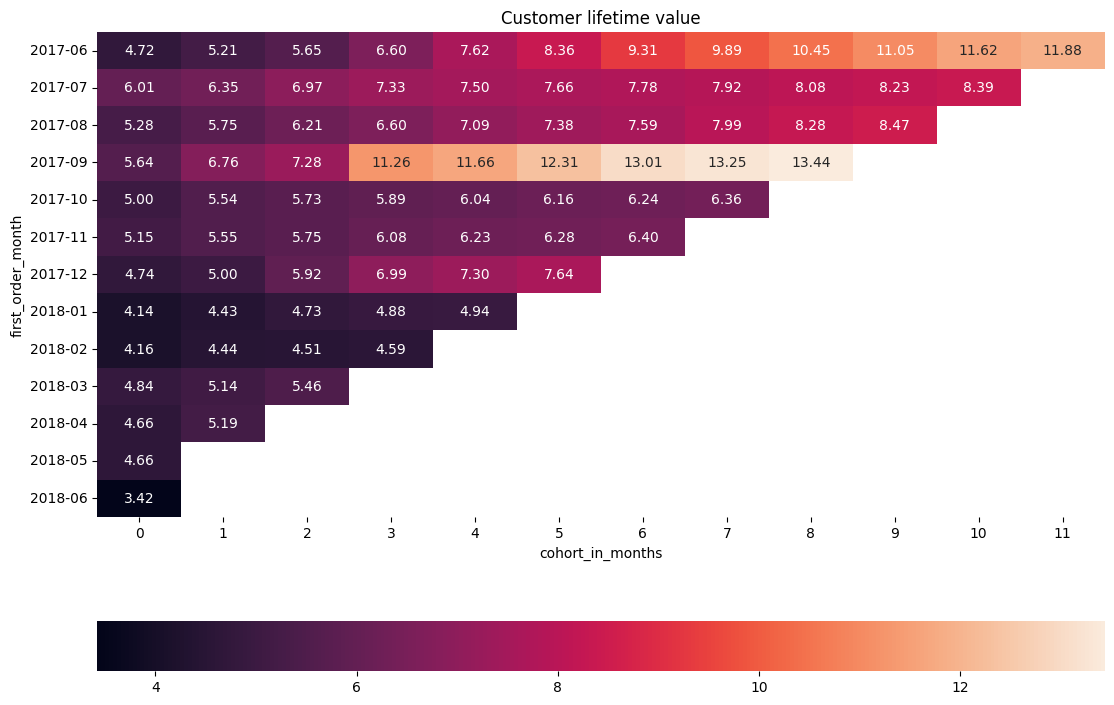

In [300]:
# Crear una figura y ejes para los subplots
fig = plt.subplots(figsize=(13, 9))

sns.heatmap(cohorts_result, annot=True, fmt='.2f', cbar_kws={'orientation':'horizontal'}).set(title='Customer lifetime value')
plt.show()

Respecto a la gráfica de calor se puede ver que durante los primero meses (cohorte 0), hay una variabilidad considerable en los valores de vida del cliente, y a medida que avanzan los meses, hay ciertas cohortes que muestran un aumento en el valor de vida del cliente, mientras que otras disminuyeron. Los picos de alto valor se pueden identificar en cohortes específicas, en el mes 2 y 5 para varias cohortes. Algunas cohortes, como las que inician en los meses de invierno tienden a tener valores más altos de vida del cliente en comparación con otras. Finalmente cabe destacar que el identificar cohortes con mayor valor de vida del cliente puede ayudar a enfocarse en estrategias de retención específicas para esos grupos. 

In [301]:
# Calcular el LTV promedio de todo el período 
ltv_average = cohorts_result.mean(axis=0)[11]
print(f'El LTV promedio durante el período es de: {ltv_average}')

El LTV promedio durante el período es de: 11.88


**3. Marketing**

# ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

In [302]:
# Calcular cuánto dinero se gastó
print(f'El costo total es de: {df_costs["costs"].sum()}')

El costo total es de: 329131.62


In [303]:
# Calcular el total por fuente de adquisición
total_per_source = df_costs.groupby('source_id').agg({'costs':'sum'})

In [304]:
# Imprimir los datos
total_per_source

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [305]:
# Calcular el total a lo largo del tiempo
total_over_time = df_costs.groupby('dt_month').agg({'costs':'sum'}).reset_index()

In [306]:
# Imprimir los datos
total_over_time

,dt_month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


**Graficar los resultados obtenidos**

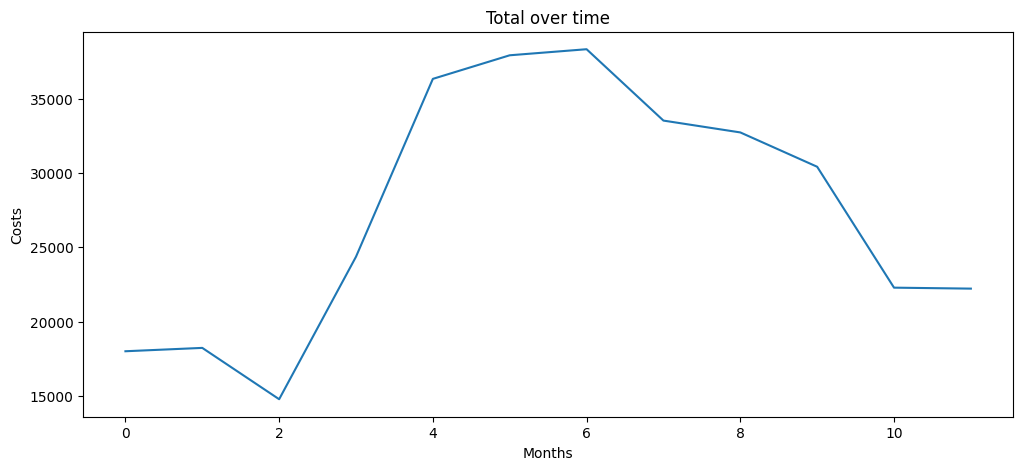

In [307]:
# Crear una figura y ejes para los subplots
fig = plt.subplots(figsize=(12, 5))
sns.lineplot(data=total_over_time['costs']).set(title='Total over time', xlabel='Months', ylabel='Costs')
plt.show()

Para esta gráfica de líneas en el mes de Junio el costo aproximadamente a lo largo del periodo fue de 18000, teniendo un descenso inicial de 15000 para agosto de 2017, además se pueden observar que los costos aumentaron de manera significativa hasta alcanzar un pico aproximadamente de 37000 en el mes de noviembre todo ello con el fin de  incentivar la compra de entradas durante el black friday y el cyber monday que se llevo acaba el último viernes del mes de noviembre y el primer lunes del mes de diciembre, y finalmente se puede ver que se tiene una disminución significativa después del pico elevando, donde los costos llegan a un valor cercano a los 24000 en mayo de 2018. Cabe mencionar que los costos a lo largo del tiempo pueden ser retribuidos con la llegada de nuevos usuarios a la plataforma que con el paso del tiempo se conviertan en clientes leales para la empresa. 

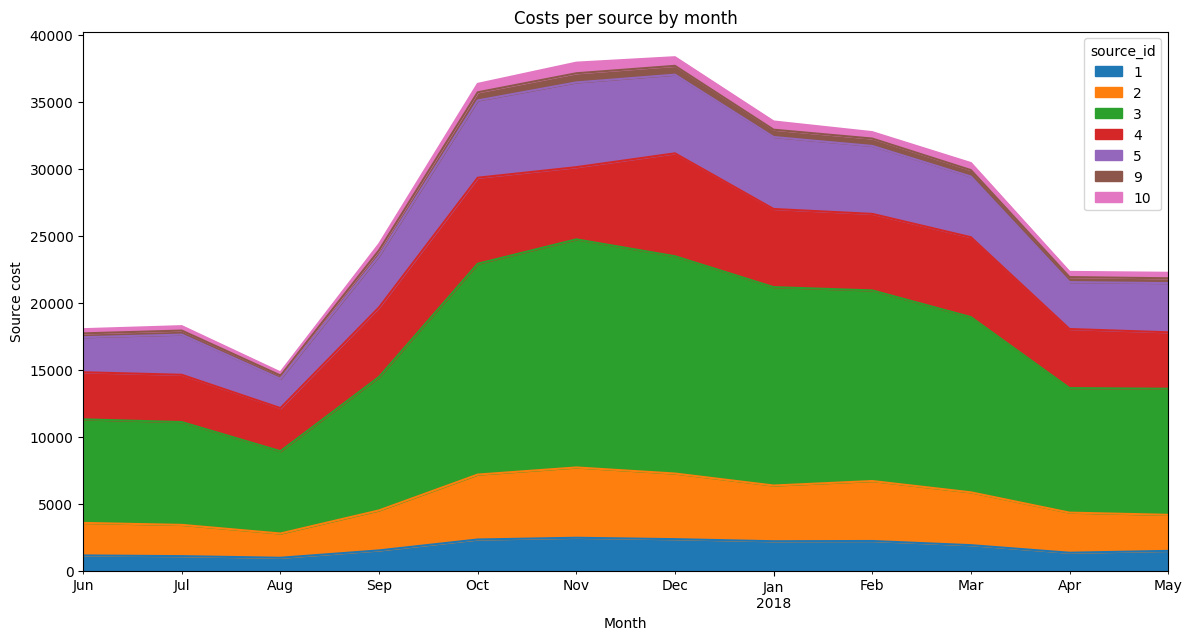

In [308]:
# Calcular los valores para la tabla dinámica y graficar los datos
(df_costs.pivot_table(
    index='dt_month', 
    columns='source_id', 
    values='costs', 
    aggfunc='sum'
).plot.area(figsize=(14,7), title='Costs per source by month', xlabel = 'Month', ylabel = 'Source cost'))

plt.show()


Está gráfica de área muestra como es el comportamiento de los costos por fuente mes a mes y es el complemento de la gráfica de líneas anterior, esta muestra como los costos son relativamente bajos, gracias a que se tiene contribuciones de varias fuentes, además se puede ver que los costos totales aumentan significativamente teniendo su pico más alto en noviembre a consecuencia de la inversión en marketing para traer a nuevos usuarios durante el black friday y el cyber monday, y los costos poco a poco va disminuyendo gradualmente hasta el mes de mayo. Cabe mencionar conforme se pintan las áreas de cada fuente que los costos que generan mayor inversión son la de color verde, seguida de la fuente de color morado y de la fuente de color rojo con un costo de inversión similar entre ellas, y finalmente en una cuarta posición la fuente de color amarillo, para el caso de las últimas tres fuentes representan en conjunto un mejor costo de inversión donde están incluidas la de color azul, la de color violeta y la de color café en ese orden respectivamente. 

# ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [309]:
# Imprimir una muestra de los datos
complete_visits.head()

,uid,first_session_start_ts,first_session_date,first_session_month,device,end_ts,source_id,start_ts,session_month,session_week,session_date,session_duration,visit_in_months
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03,9,2018-03-01,360,0
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02,6,2018-02-06,120,0
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06,23,2017-06-07,60,0
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03,10,2018-03-11,360,6
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09,38,2017-09-18,1080,0


In [310]:
# Ordenar los datos y agrupar por la columna uid
users = complete_visits.sort_values('first_session_start_ts').groupby('uid').first()
users = users[['source_id']]

In [311]:
# Imprimir una muestra de los datos
users.head()

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5


In [312]:
# Imprimir una muestra de los datos
buyers.head()

,uid,first_registration_ts,first_order_ts,first_order_dt,first_order_month,day_to_first_purchase
0,313578113262317,2017-09-18,2018-01-03,2018-01-03,2018-01,107
1,1575281904278712,2017-06-03,2017-06-03,2017-06-03,2017-06,0
2,2429014661409475,2017-10-11,2017-10-11,2017-10-11,2017-10,0
3,2464366381792757,2018-01-27,2018-01-28,2018-01-28,2018-01,1
4,2551852515556206,2017-11-24,2017-11-24,2017-11-24,2017-11,0


In [313]:
# Unir los dataframes BUYERS y USERS
final_report_cac = pd.merge(buyers, users, left_on='uid', right_index=True)

In [314]:
# Imprimir una muestra de los datos
final_report_cac.head()

,uid,first_registration_ts,first_order_ts,first_order_dt,first_order_month,day_to_first_purchase,source_id
0,313578113262317,2017-09-18,2018-01-03,2018-01-03,2018-01,107,2
1,1575281904278712,2017-06-03,2017-06-03,2017-06-03,2017-06,0,10
2,2429014661409475,2017-10-11,2017-10-11,2017-10-11,2017-10,0,3
3,2464366381792757,2018-01-27,2018-01-28,2018-01-28,2018-01,1,5
4,2551852515556206,2017-11-24,2017-11-24,2017-11-24,2017-11,0,5


In [315]:
# Agrupar por source id y first order ts y contar los uid
buyers_days = final_report_cac.groupby(['source_id', 'first_order_ts']).agg({'uid':'count'}).reset_index()

In [316]:
# Cambiar el nombre a las columnas
buyers_days.columns = ['source_id', 'first_order_ts', 'num_buyers']

In [317]:
# Validar los cambios en el nombre de las columnas
buyers_days.columns

Index(['source_id', 'first_order_ts', 'num_buyers'], dtype='object')

In [318]:
# Imprimir una muestra de los datos
buyers_days.head()

,source_id,first_order_ts,num_buyers
0,1,2017-06-01,15
1,1,2017-06-02,11
2,1,2017-06-03,7
3,1,2017-06-04,4
4,1,2017-06-05,14


In [319]:
# Unir los dataframes BUYERS DAYS y DF COSTS
final_costs_cac = pd.merge(buyers_days, df_costs, left_on=['source_id', 'first_order_ts'], right_on=['source_id', 'dt'])

In [320]:
# Imprimir una muestra de los datos
final_costs_cac.head()

,source_id,first_order_ts,num_buyers,dt,costs,dt_month,dt_date
0,1,2017-06-01,15,2017-06-01,75.20,2017-06,2017-06-01
1,1,2017-06-02,11,2017-06-02,62.25,2017-06,2017-06-02
2,1,2017-06-03,7,2017-06-03,36.53,2017-06,2017-06-03
3,1,2017-06-04,4,2017-06-04,55.00,2017-06,2017-06-04
4,1,2017-06-05,14,2017-06-05,57.08,2017-06,2017-06-05


In [321]:
# Calcular el CAC para cada una de las fuentes
final_costs_cac['cac'] = final_costs_cac['costs'] / final_costs_cac['num_buyers']

In [322]:
# Imprimir una muestra de los datos
final_costs_cac.head()

,source_id,first_order_ts,num_buyers,dt,costs,dt_month,dt_date,cac
0,1,2017-06-01,15,2017-06-01,75.20,2017-06,2017-06-01,5.013333
1,1,2017-06-02,11,2017-06-02,62.25,2017-06,2017-06-02,5.659091
2,1,2017-06-03,7,2017-06-03,36.53,2017-06,2017-06-03,5.218571
3,1,2017-06-04,4,2017-06-04,55.00,2017-06,2017-06-04,13.750000
4,1,2017-06-05,14,2017-06-05,57.08,2017-06,2017-06-05,4.077143


**Graficar los resultados obtenidos**

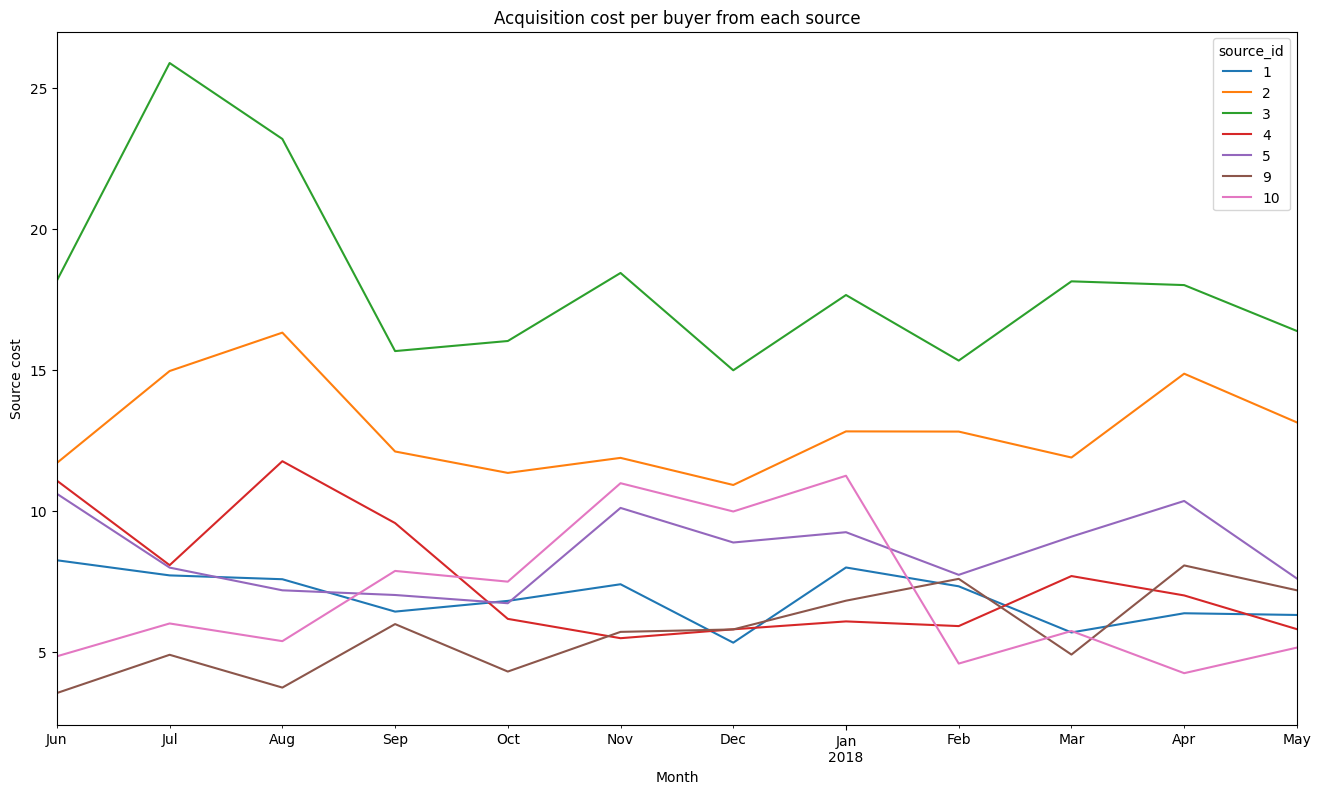

In [323]:
# Calcular los valores para la tabla dinámica y graficar los datos
final_costs_cac.pivot_table(
    index=['dt_month'], 
    columns='source_id', 
    values='cac', 
    aggfunc='mean').plot(figsize=(16,9), title='Acquisition cost per buyer from each source', xlabel = 'Month', ylabel = 'Source cost')
plt.show()

Esta gráfica de líneas muestra la variación en el costo de adquisición de clientes de cada una de las fuentes a lo largo del periodo de tiempo, se puede observar los puntos donde las líneas alcanzan picos o valles. Como en el caso de la fuente 1 de color azul tiene un pico en noviembre lo que indica un aumento significativo en el costo de adquisición durante ese mes. Se visualiza también que la fuente 4 de color rojo muestra una tendencia constante con menos fluctuaciones mientras que la fuente 2 de color naranja presenta variaciones más marcadas. Finalmente cabe mencionar que se ve que el mes de noviembre es un mes crítico donde varias fuentes alcanzan su costo máximo de adquisición, posiblemente debido a eventos específicos como promociones de fin de año o aumentos estacionales en la demanda. 

# ¿Cuán rentables eran las inversiones? (ROMI)

In [324]:
# Imprimir una muestra de los datos
final_report_ltv.head()

,first_order_month,number_buyers,buy_month,revenue,cohort_in_months,ltv
0,2017-06,2023,2017-06,9557.49,0,4.724414
1,2017-06,2023,2017-07,981.82,1,0.485329
2,2017-06,2023,2017-08,885.34,2,0.437637
3,2017-06,2023,2017-09,1931.30,3,0.954671
4,2017-06,2023,2017-10,2068.58,4,1.022531


In [325]:
# Imprimir una muestra de los datos
final_costs_cac.head()

,source_id,first_order_ts,num_buyers,dt,costs,dt_month,dt_date,cac
0,1,2017-06-01,15,2017-06-01,75.20,2017-06,2017-06-01,5.013333
1,1,2017-06-02,11,2017-06-02,62.25,2017-06,2017-06-02,5.659091
2,1,2017-06-03,7,2017-06-03,36.53,2017-06,2017-06-03,5.218571
3,1,2017-06-04,4,2017-06-04,55.00,2017-06,2017-06-04,13.750000
4,1,2017-06-05,14,2017-06-05,57.08,2017-06,2017-06-05,4.077143


In [326]:
# Unir los dataframes FINAL REPORT LTV y FINAL COSTS CAC
final_report_romi = pd.merge(final_report_ltv, final_costs_cac[['source_id', 'dt_month', 'cac']], left_on='first_order_month', right_on='dt_month', how='inner')

In [327]:
# Imprimir una muestra de los datos
final_report_romi.head()

,first_order_month,number_buyers,buy_month,revenue,cohort_in_months,ltv,source_id,dt_month,cac
0,2017-06,2023,2017-06,9557.49,0,4.724414,1,2017-06,5.013333
1,2017-06,2023,2017-06,9557.49,0,4.724414,1,2017-06,5.659091
2,2017-06,2023,2017-06,9557.49,0,4.724414,1,2017-06,5.218571
3,2017-06,2023,2017-06,9557.49,0,4.724414,1,2017-06,13.750000
4,2017-06,2023,2017-06,9557.49,0,4.724414,1,2017-06,4.077143


In [328]:
# Calcular el ROMI para cada una de las fuentes
final_report_romi['romi'] = final_report_romi['ltv'] / final_report_romi['cac']

In [329]:
# Imprimir una muestra de los datos
final_report_romi.head()

,first_order_month,number_buyers,buy_month,revenue,cohort_in_months,ltv,source_id,dt_month,cac,romi
0,2017-06,2023,2017-06,9557.49,0,4.724414,1,2017-06,5.013333,0.942370
1,2017-06,2023,2017-06,9557.49,0,4.724414,1,2017-06,5.659091,0.834836
2,2017-06,2023,2017-06,9557.49,0,4.724414,1,2017-06,5.218571,0.905308
3,2017-06,2023,2017-06,9557.49,0,4.724414,1,2017-06,13.750000,0.343594
4,2017-06,2023,2017-06,9557.49,0,4.724414,1,2017-06,4.077143,1.158756


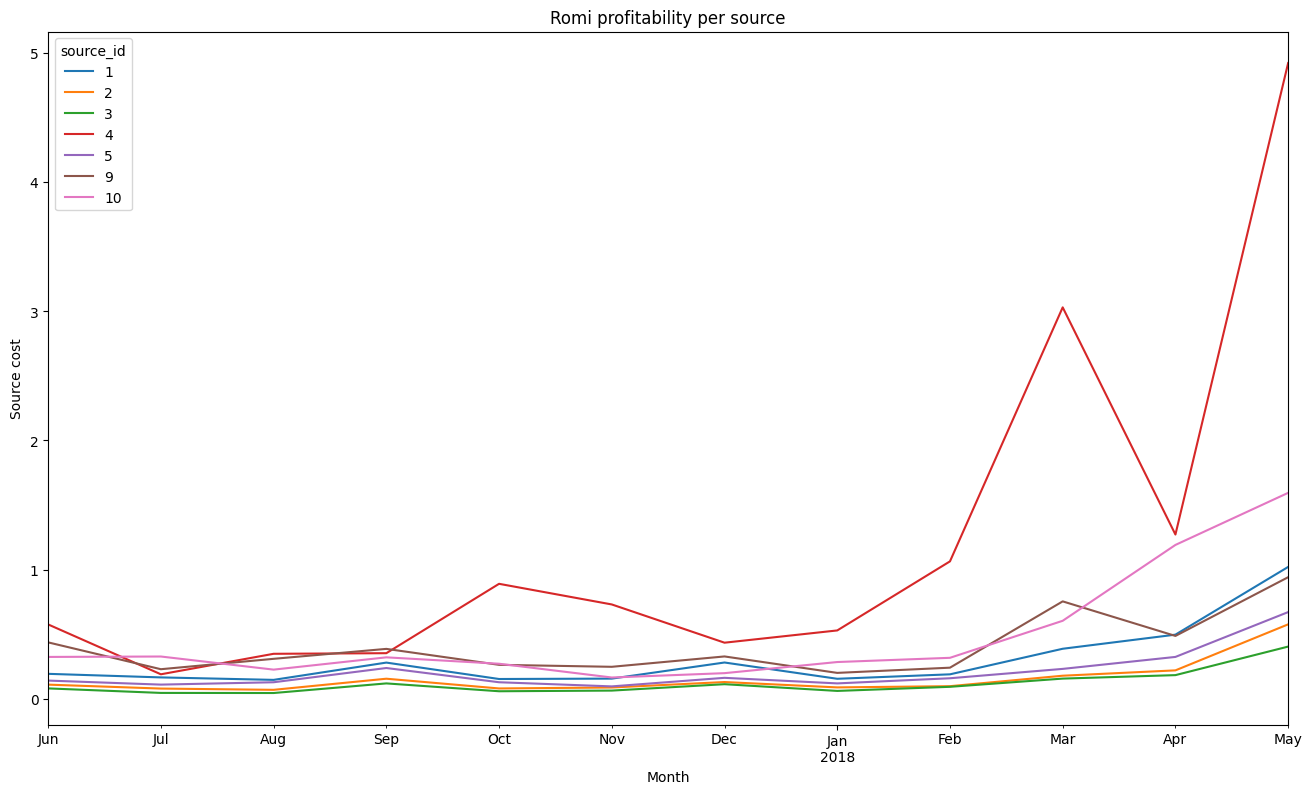

In [330]:
# Calcular los valores para la tabla dinámica y graficar los datos 
final_report_romi.pivot_table(
    index='dt_month', 
    columns='source_id', 
    values='romi', 
    aggfunc='mean'
).plot(figsize=(16,9), title='Romi profitability per source', xlabel = 'Month', ylabel = 'Source cost')
plt.show()

En está última gráfica se puede ver que la mayoría de las fuentes muestran un comportamiento relativamente estable, pero hay algunas fluctuaciones que podrían estar relacionadas con factores estacionales, cambios en la demanda, o estrategias de marketing específicas aplicadas durante ciertos meses. Respecto a la fuente 4 de color rojo a pesar del aumento significativo en los costos, esto podría implicar que esta fuente ha sido más intensiva en sus esfuerzos de marketing. El análisis del retorno generado es crucial para determinar si el aumento de los costos ha valido la pena. Finalmente ser puede ver que la fuente 1 de color azul y la fuente 2 de color naranja mantienen una estabilidad en sus costos lo que sugiere que estas fuentes han mantenido una inversión constante en marketing. Un retorno de la inversión estable y positivo indicaría que estas estrategias son efectivas y sostenibles a lo largo del tiempo.

**ETAPA 4. Escribe una conclusión**

**Aconseja a los expertos de marketing cuánto dinero invertir y dónde**

**¿Qué fuentes/plataformas recomendarías?  Fundamenta tu selección: ¿en qué métricas te enfocaste?  ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los valores métricos?**

Para concluir recomendaria la fuente 1 de color azul por su estabilidad y eficiencia. Ideal para estrategias de marketing a largo plazo, la fuente 2 de color naranja por su consistencia y eficiencia, mientras que la fuente 4 de color rojo podría ser recomendada durante ciertos periodos de alta demanda, pero requiere ser monitoreada constantemente para asegurarse de que el aumento en costos se traduce en mayores beneficios. Es recomendable diversificar las inversiones en fuentes con estabilidad y aquellas que, aunque más volátiles, pueden traer beneficios durante ciertos periodos clave. Consideró que evaluar constantemente el ROMI de cada fuente permite ajustar las estrategias de marketing según los cambios en el mercado y las respuestas de los comsumidores. Mantener un ROMI positivo asegura que las inversiones en marketing siguen siendo rentables. El análisis de métricas como CAC (Costo de adquisión del cliente) y ROMI (Retorno de la inversión en marketing) revela que una combinación de fuentes estables y de alto impacto puede maximizar la efectividad y rentabilidad de las estrategias de marketing. Estás recomendaciones permiten una estrategia de marketing equilibrada que optimiza tanto la estabilidad financiera como la capacidad de respuesta a las oportunidades de mercado. Finalmente si el LTV "valor del ciclo de vida del cliente" se mantiene, vale la pena invertir incluso si el CAC es más alto para ciertas fuentes, siempre y cuando el ROMI siga siendo positivo. Para el caso de las fuentes 1 de color azul y 2 de color naranja con un LTV alto y un CAC bajo, estas fuentes son ideales para una inversión constante, asegurando una base de ingresos sostenibles. Mientras que para la fuente 4 de color rojo pueden ser explotadas en periodos específicos de alta demanda, siempre y cuando el LTV justifique la inversión. Estas fuentes ofrecen oportunidades de alto retorno a corto plazo. Finalemte cabe destacar que al evaluar y comparar el LTV con el CAC y el ROMI, se puede optimizar las estrategias de marketing de la empresa Showz para maximizar la rentabilidad a largo plazo y asegurarse de que cada inversión en adquisición de clientes sea eficiente y efectiva. 